# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load .csv file with data
product_sales = pd.read_csv('product_sales.csv')

In [3]:
# show how the dataframe looks
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


# Data validation

In [4]:
# check the data types in columns are correct with the instructions
product_sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [5]:
# check where are null values
product_sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

There are null values only in revenue column

## 'week' column

In [6]:
# check 'week' column is correct
product_sales['week'].value_counts().sort_index()

1    3721
2    2491
3    2411
4    2575
5    2574
6    1228
Name: week, dtype: int64

Every value in week column is an integer from 1 to 6

## 'sales_method' column

In [7]:
# check 'sales_method' column is correct
product_sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

There are 'email' and 'em + call' values which have to be replaced

In [8]:
# 'sales_method' column is not correct, values 'email' and 'em + call' have to be replaced by a proper form
product_sales['sales_method'] = product_sales['sales_method'].replace({'email' : 'Email', 'em + call' : 'Email + Call'})

## 'nb_sold' column

In [9]:
# check 'nb_sold' column is correct
product_sales['nb_sold'].value_counts().sort_index()

7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: nb_sold, dtype: int64

Correct. Every value is an integer from 7 to 16.

## 'years_as_customer' column

In [10]:
# check 'years_as_customer' column is correct
product_sales['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [11]:
product_sales[product_sales['years_as_customer'] > (2023-1984)].value_counts().sort_index()

week  sales_method  customer_id                           nb_sold  revenue  years_as_customer  nb_site_visits  state     
2     Email         18919515-a618-430c-9a05-2c7d8fea96af  10       97.22    63                 24              California    1
4     Call          2ea97d34-571d-4e1b-95be-fea1c404649f  10       50.47    47                 27              California    1
dtype: int64

In [12]:
product_sales.loc[product_sales['years_as_customer'] > (2023-1984), 'years_as_customer'] = pd.NA

There are two customers who are customers for more than the company is functionning. Too big numbers were replaced by null.

## 'state' column

In [13]:
# check 'state' column is correct
product_sales['state'].value_counts().sort_index()

Alabama            214
Alaska              40
Arizona            321
Arkansas           132
California        1872
Colorado           230
Connecticut        179
Delaware            34
Florida            904
Georgia            489
Hawaii              72
Idaho               62
Illinois           617
Indiana            354
Iowa               165
Kansas             142
Kentucky           213
Louisiana          230
Maine               63
Maryland           263
Massachusetts      294
Michigan           498
Minnesota          245
Mississippi        139
Missouri           311
Montana             45
Nebraska            91
Nevada             102
New Hampshire       53
New Jersey         434
New Mexico          84
New York           965
North Carolina     459
North Dakota        30
Ohio               566
Oklahoma           196
Oregon             229
Pennsylvania       598
Rhode Island        43
South Carolina     224
South Dakota        41
Tennessee          340
Texas             1187
Utah       

All of the values are in fact US states. Correct.

## Summary

Most of the columns in loaded dataframe provide data correctly according to the received instruction. However there are three columns with some conerns:
- 'sales_method' column includes 'em' and 'email + call' values which had to be replaced by 'Email' and 'Email + Call' respectively to fit other values correctly
- 'revenue' column includes 1074 null values, which will be simple ignored in future calculations
- 'years_as_customer' column includes two customers who has been buying for more than 39 years, it is more than the company functions

# How many customers were there for each approach?


In [14]:
# count all the unique customers
product_sales['customer_id'].nunique()

15000

In [15]:
# count all the unique customers by the sales_method
product_sales.groupby('sales_method')['customer_id'].nunique()

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

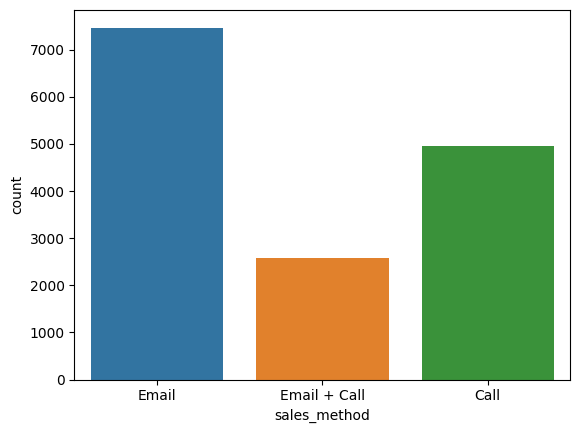

In [16]:
# visualize the distribution of sales_method
sns.countplot(data = product_sales,
           x = 'sales_method')
plt.show()

There were 15000 customers in total. They were seperated targeted by three different sales methods:
- Call: 4962
- Email: 7466
- Email + Call: 2572

# What does the spread of the revenue look like overall? And for each method?

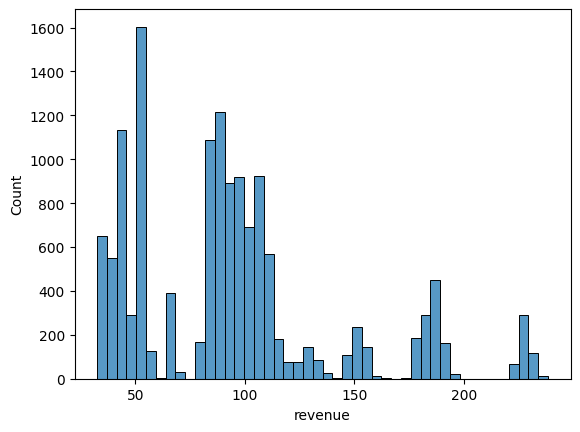

In [17]:
# visualize the spread of the revenue overall...
sns.histplot(data = product_sales,
            x = 'revenue')
plt.show()

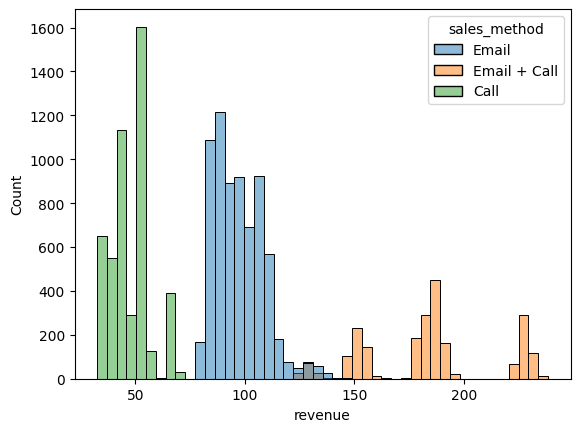

In [18]:
# ... and for each method
sns.histplot(data = product_sales,
            x = 'revenue',
            hue = 'sales_method')
plt.show()

The spread of the revenue overall is visualized using a histogram. We can see that distribution is multimodal, and the most number sale are in the range of revenue from 20 to 60 and from 70 to 125.

When the hisrogram shows the distribution sales methods we can find, that height of revenue per sale is highly dependent on sales method, so for revenues:
- from 20 to 75, there are only sales with Call method
- from 75 to 125, only Email
- and from 125 nearly only Email + Call

# Was there any difference in revenue over time for each of the methods?

In [19]:
# calculate average revenue by week ...
week_revenue = product_sales.groupby('week')['revenue'].mean().reset_index()
week_revenue

,week,revenue
0,1,78.012599
1,2,85.260362
2,3,81.425144
3,4,98.734210
4,5,107.650583
5,6,148.824580


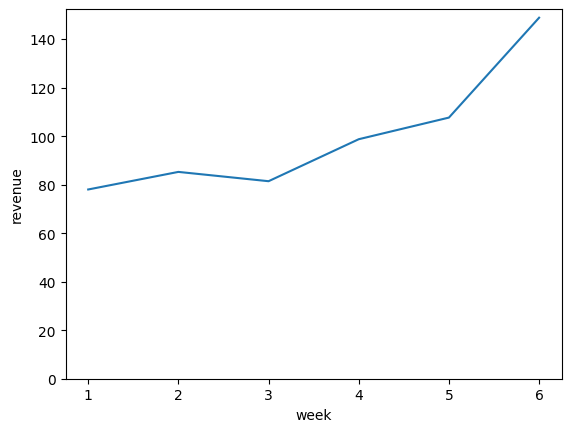

In [20]:
# ... and visualize results
sns.lineplot(data = week_revenue,
            x = 'week',
            y = 'revenue').set_ylim(0)

plt.show()

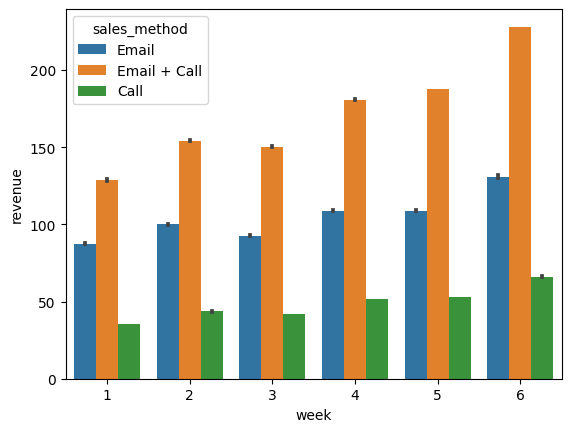

In [21]:
# visualize change of revenues over time by sales_method
sns.barplot(data = product_sales,
               y = 'revenue',
               x = 'week',
               hue = 'sales_method')
plt.show()

From the provided charts we can find the revenue overall is getting higher and higer every week from nearly 80 in the first week to over 140 in the last one. We can also see that week by week the numbers are getting higher in all sales methods, but revenues from Email + Call method are much higher than from Email method and especially from Call method. In the sixth week Email + Call revenues seems to be nearly two times higher than Email method and three times than Call method. The advantage of Email + Call over other methods is going greater in time also.

# Other differences and metrics

## Metrics

To better know the received data we can introduce some metrics for each sales method.

In [22]:
# calculate average nb_site_visits by sales_method
avg_visits = product_sales.groupby('sales_method')['nb_site_visits'].mean()
avg_visits

sales_method
Call            24.423821
Email           24.754353
Email + Call    26.771384
Name: nb_site_visits, dtype: float64

In [23]:
# calculate average years_as_customer by sales_method
avg_years = product_sales.groupby('sales_method')['years_as_customer'].mean()
avg_years

sales_method
Call            5.168313
Email           4.976021
Email + Call    4.507387
Name: years_as_customer, dtype: float64

In [24]:
# calculate average nb_sold by sales_method
avg_nb_sold = product_sales.groupby('sales_method')['nb_sold'].mean()
avg_nb_sold

sales_method
Call             9.509674
Email            9.729306
Email + Call    12.225505
Name: nb_sold, dtype: float64

In [25]:
# Calculate average revenue by each sales method and creating the metric
# reset_index() is used to create a plot easier later 
avg_revenue = product_sales.groupby('sales_method')['revenue'].mean().reset_index()
avg_revenue

,sales_method,revenue
0,Call,47.597467
1,Email,97.127684
2,Email + Call,183.651233


In [26]:
revenue_nb_sold = product_sales.groupby('sales_method')['revenue'].sum() / product_sales.groupby('sales_method')['nb_sold'].sum()
revenue_nb_sold

sales_method
Call             4.822589
Email            9.255604
Email + Call    12.983612
dtype: float64

As you can find some proposed metrics above, several of them are more worth notable now.

First of all the average revenue gives us the best way to measure profitability of each sales method. It should be also combined with the cost of implementing of each method (costs for the employee responsible for calling or sending emails), but due to lack of this specific informations the metric does not include that.

The average new products sold (nb_sold) also gives us some useful informations, that Email + Call sales method gives more products sold than the other methods.

Also revenue_nb_sold gives us some information, that Email + Call has more revenue per sold product than any other method. It is nearly three times higher than Call method and 1.5 times higher than Email method.

All the other metrics have so similar results for every method that they are not worthy of any concrete conclusions.

## Other differences

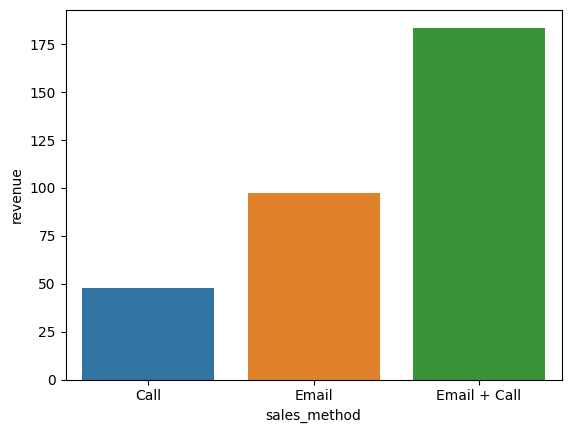

In [50]:
# visualize avg_revenue using barplot
sns.barplot(data = avg_revenue,
           x = 'sales_method',
           y = 'revenue')
plt.show()

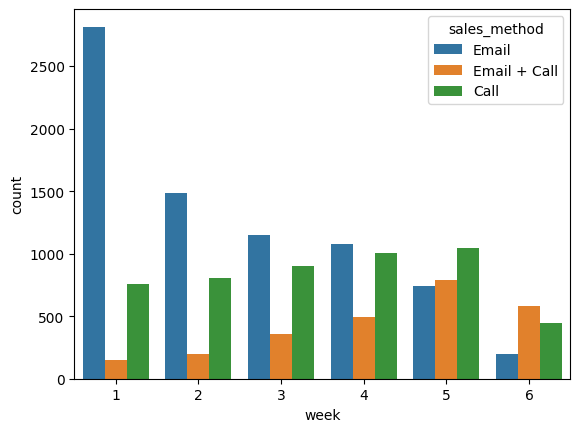

In [28]:
# visualize number of different sales_method over weeks
sns.countplot(data = product_sales,
           x = 'week',
           hue = 'sales_method')
plt.show()

In [48]:
product_sales.value_counts('sales_method')


sales_method
Email           7466
Call            4962
Email + Call    2572
dtype: int64

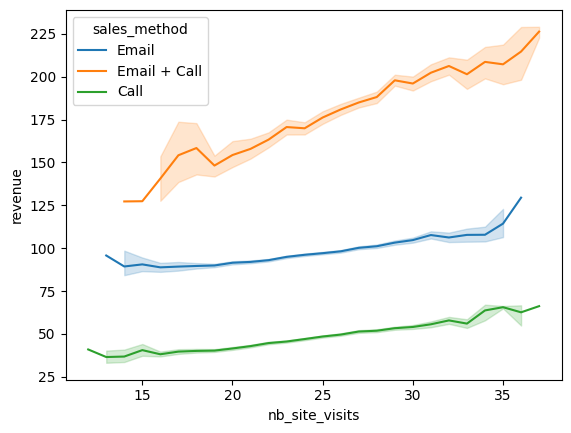

In [55]:
# visualization of revenue by nb_site_visits grouped by sales_method
sns.lineplot(data = product_sales,
            y = 'revenue',
            x = 'nb_site_visits',
            hue = 'sales_method')
plt.show()

We can also find that customers in Email + Call sales method group are little more interested in visitting out website and the more customers visit the website the more revenues we get. It also seems that Email + Call group gives unproportionally more revenue by every website visit they done.

The Email + Call group also purchases much more new products (nb_sold) than other method groups. It is by average 9.5 and 9.7 for Call and Email respectively and 12.2 for Email + Call.

Also the distribution of distribution sales by each sales_method seems to be very interesting. While Email method group has very big number of purchases in the very first week and it decreases every week, the other methods have increase every week (except the last one). The changes in Call method are more stablethan in Email + Call method.

After analyzing revenue over sales_method barplot and the week countplot it is clear that the number of Call sales is very big, especially in the first weeks, so it could be seen as a very effective method, but the revenues tell us the opposite and it gives in total much less profits then the other methods.

Finally we can see that average revenue per customer is highest in the Email + Call group (over 175). It is much bigger (over 3 times) than in Call group (less than 50), and nearly two times bigger than Email method (less than 100).

# Based on the data, which method would you recommend we continue to use?

Assuming we can find that Email + Call method should be introduced into much bigger scale. It gives much more profits than other methods, so every ten minutes of phone calling per customer is definetely worth of it. These group of clients seems to give more revenues per sold product, but after a longer time of consideration.

Call method should be definetely abondoned. It is the less efficient method, with little revenues, and also the most costed. It should be underlined that this method is still much less profitable in compare to its big number of sales, especially in the first week.

Email method is the average one. It is not as efficient as Email + Call, but thanks to it requires low costs for the team it can be surely retained. This group of client gives little revenue, but in shorter time (probably immediately after a phone call).

So definetely I would recommend to use Email + Call sales method on a much bigger scale and abandon Call method.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation